# 🚀 Emotion Recognition of Customer Evaluations in the Retail Industry

## 📝 Introduction & Objectives

<details>
<summary><strong>🔍 Emotion Analysis Overview</strong></summary>

An **emotion analysis model** applies NLP techniques to classify and extract emotional content from text data.  

</details>

<details>
<summary><strong>🎯 Benefits of Emotion Analysis</strong></summary>

- 📝 **Improves user experience through authentic feedback**  
  - _e.g., analyzing reviews from similar product users_  
- 💡 **Supports decision-making for businesses**  
  - _e.g., understanding customer emotions for product improvement_  
- 🎯 **Enhances recommendation and precision marketing**  
  - _e.g., targeting based on emotional tone of feedback_  
- 🔄 **Provides value to both users and enterprises**  
  - _e.g., mutual benefit from shared evaluations and comparisons_  
- 🛠️ **Cultivates project implementation thinking**  
  - _e.g., practicing problem breakdown, ranking, and solution design_  

</details>

## 🛠️ Data Loading and Initial Exploration

In [1]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib as mpl 
import numpy as np
import re 
import string 
import nltk 
%matplotlib inline

# Load dataset
df = pd.read_csv('1429_1.csv')
df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


## ⚙️ Data Preprocessing & Feature Engineering

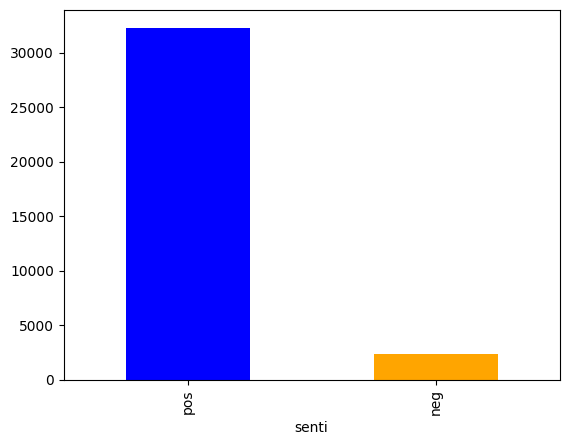

In [2]:
# Extract important columns
df = df[["reviews.rating", "reviews.text", "reviews.username", "reviews.title"]]

# View missing values
df.isnull().sum()

# Filter rows without missing reviews.rating
senti = df[df["reviews.rating"].notna()]
senti = senti.rename(columns={"reviews.rating": "senti"})

# Assign positive/negative labels
senti["senti"] = senti["senti"].apply(lambda x: "pos" if x >= 4 else "neg")

# Plot positive and negative samples
senti["senti"].value_counts().plot(kind="bar", color=["blue", "orange"])
plt.show()

## 🧠 Model Training

In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define cleanup function
def cleanup(text):
    if not isinstance(text, str):
        return ""
    text = re.sub(r"[^a-zA-Z]", " ", text)
    text = text.lower()
    text = re.sub(r"\s+", " ", text).strip()
    return text

senti["summary_clean"] = senti["reviews.text"].apply(cleanup)

# Split data into train and test sets
split = senti[["summary_clean", "senti"]]
train = split.sample(frac=0.8, random_state=42)
test = split.drop(train.index)

# Vectorization (CountVectorizer) + TF-IDF (TfidfTransformer)
cv = CountVectorizer()
tfidf = TfidfTransformer()

# Fit on training text
X_train_counts = cv.fit_transform(train['summary_clean'])
X_train_tfidf = tfidf.fit_transform(X_train_counts)

# Transform test text
X_test_counts = cv.transform(test['summary_clean'])
X_test_tfidf = tfidf.transform(X_test_counts)

# Encode labels to binary 0/1 (neg=0, pos=1)
y_train = (train['senti'] == 'pos').astype(int).values
y_test = (test['senti'] == 'pos').astype(int).values

# Train and evaluate models
models = {
    'MultinomialNB': MultinomialNB(),
    'BernoulliNB': BernoulliNB(),
    'LogisticRegression': LogisticRegression(max_iter=1000)
}

for name, model in models.items():
    X_train_input = X_train_tfidf if name != 'BernoulliNB' else (X_train_counts > 0).astype(int)
    X_test_input = X_test_tfidf if name != 'BernoulliNB' else (X_test_counts > 0).astype(int)
    
    model.fit(X_train_input, y_train)
    y_pred = model.predict(X_test_input)
    acc = accuracy_score(y_test, y_pred)
    print(f'{name} accuracy: {acc:.4f}')

MultinomialNB accuracy: 0.9311
BernoulliNB accuracy: 0.8939
LogisticRegression accuracy: 0.9383


## 📈 Model Evaluation

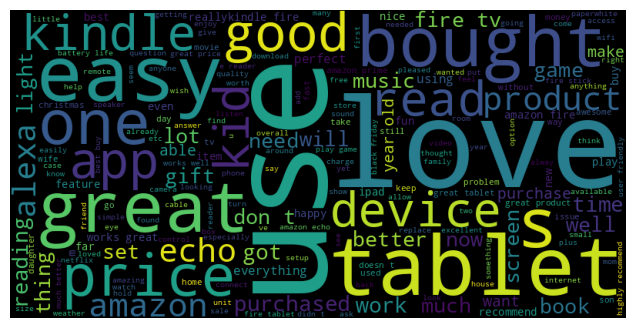

In [4]:
from wordcloud import WordCloud

# Build a Word Cloud
wc = WordCloud(width=800, height=400)
pos_text = ' '.join(train['summary_clean'].tolist())
img = wc.generate(pos_text)
plt.figure(figsize=(8,4))
plt.imshow(img)
plt.axis('off')
plt.show()